# **천문 평점, 관람평, 닉네임, 시간, 공감, 비공감**

In [2]:
import numpy as np
import pandas as pd
from selenium import webdriver
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
chrome_loc = 'C:/chrome/chromedriver.exe'
driver = webdriver.Chrome(chrome_loc)
driver.get('https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=181381&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1')

In [4]:
movie_html = driver.page_source
movie = BeautifulSoup(movie_html, 'html.parser')

# ================================================  
### **설명**

In [167]:
movie.select('div.star_score')[0].text.split('\n')[1]      ## 평점

'9'

In [168]:
try:
    try :
        ele = driver.find_element_by_css_selector('#_text_spo_{} > a'.format(i))  ## 스포일러 포함된 감상평 펼치기
        ele.click()
    except : 
        ele = driver.find_element_by_id('_filtered_ment_{}'.format(i))   ## 감상평이 긴거 펼치기
        ele.click()
    comment = ele.text
except:
    comment = ''    ## 감상평이 없을때

In [169]:
movie.select('div.score_reple > dl > dt > em')[0].text   ## ID  짝수
movie.select('div.score_reple > dl > dt > em')[1].text  ## 시간 홀수

'2019.12.26 09:19'

In [170]:
int(movie.select('div.btn_area > a > strong')[0].text)  ## 공감  짝수
int(movie.select('div.btn_area > a > strong')[1].text)  ## 비공감 홀수

265

In [171]:
int(movie.select('strong.total > em')[0].text.replace(',',''))  ## 총 감상평 수

12463

# ===================================
### **실행코드**

In [5]:
page = np.ceil(int(movie.select('strong.total > em')[0].text.replace(',',''))/10)  ## 총 페이지 수

In [7]:
astro = []
i = 0
while i < page:
    for j in range(10):
        score = int(movie.select('div.star_score')[j].text.split('\n')[1])                       ## 평점
        try:
            try :
                ele = driver.find_element_by_css_selector('#_text_spo_{} > a'.format(j))         ## 스포일러 포함된 감상평 펼치기
                ele.click()
            except : 
                ele = driver.find_element_by_id('_filtered_ment_{}'.format(j))                   ## 감상평이 긴거 펼치기
                ele.click()
            comment = ele.text
        except:
            comment = ''                 ## 감상평이 없을때
        nickname = movie.select('div.score_reple > dl > dt > em')[j * 2].text.split('\n\n')[1]   ## 닉네임
        timestamp = movie.select('div.score_reple > dl > dt > em')[j * 2 + 1].text               ## 시간
        good = int(movie.select('div.btn_area > a > strong')[j * 2].text)                        ## 공감
        bad = int(movie.select('div.btn_area > a > strong')[j * 2 + 1].text)                     ## 비공감
        astro.append([score, comment, nickname, timestamp, good, bad])
    
    nextpage = driver.find_element_by_css_selector("#pagerTagAnchor{} > em".format(i+2)) 
    nextpage.click()
    
    movie_html = driver.page_source
    movie = BeautifulSoup(movie_html, 'html.parser')
    i += 1

IndexError: list index out of range

In [8]:
## column 지정
astro = pd.DataFrame(astro)
astro.columns = ['score', 'review', 'id', 'date', 'like', 'dislike']   

In [9]:
## datetime 형식으로 변경
for i in range(len(astro['date'])):
    astro['date'].values[i] = datetime.strptime(astro['date'].values[i], '%Y.%m.%d %H:%M')

In [10]:
astro

,score,review,id,date,like,dislike
0,9,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019-12-26 09:19:00,3390,265
1,10,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019-12-26 09:14:00,2714,400
2,10,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019-12-26 10:37:00,2351,264
3,10,백두산에서 온 알바들아~~평점테러 하지마라!! 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019-12-26 10:25:00,1889,340
4,10,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019-12-26 09:26:00,1450,166
...,...,...,...,...,...,...
12458,6,생각보다 좀 허술한 구성. 연기력은 출중,trus****,2020-03-05 16:23:00,13,57
12459,6,머그냥저냥볼만함그래도나쁘지않음,이정진(khmw****),2020-03-06 12:01:00,5,50
12460,6,약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...,Jess(giss****),2020-03-05 07:39:00,12,67
12461,4,세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...,maxkim(maxk****),2020-02-29 13:27:00,25,141


In [11]:
pd.DataFrame(astro['id'].groupby(astro['score']).count())

,id
score,
1,433
2,309
3,50
4,270
5,150
6,523
7,313
8,953
9,809


([<matplotlib.axis.XTick at 0x225c69063c8>,
 <a list of 10 Text xticklabel objects>)

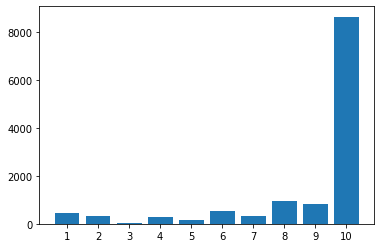

In [12]:
plt.bar(pd.DataFrame(astro['id'].groupby(astro['score']).count()).index, pd.DataFrame(astro['id'].groupby(astro['score']).count())['id'])
plt.xticks(np.linspace(1,10,10))

In [11]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [12]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

([<matplotlib.axis.XTick at 0x2043b75f4c8>,
 <a list of 10 Text xticklabel objects>)

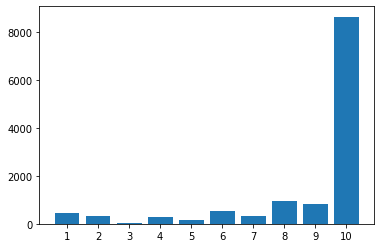

In [13]:
plt.bar(pd.DataFrame(astro['id'].groupby(astro['score']).count()).index, pd.DataFrame(astro['id'].groupby(astro['score']).count())['id'])
plt.xticks(np.linspace(1,10,10))

# ==============================================  
## **형태소 분석 설명**

In [14]:
from konlpy.tag import Okt
import re

In [15]:
okt = Okt()

In [16]:
# 형태소와 그 형태소의 형태 추출
sep = [okt.pos(word) for word in astro['review']]

In [17]:
sep

[[('한석규', 'Noun'),
  ('의', 'Josa'),
  ('세종', 'Noun'),
  ('은', 'Josa'),
  ('어떻게', 'Adjective'),
  ('해야', 'Verb'),
  ('저런', 'Noun'),
  ('연기', 'Noun'),
  ('가', 'Josa'),
  ('가능한지', 'Adjective'),
  ('의문', 'Noun'),
  ('을', 'Josa'),
  ('남긴다', 'Verb'),
  ('.', 'Punctuation'),
  ('세종대왕', 'Noun'),
  ('연기', 'Noun'),
  ('의', 'Josa'),
  ('끝', 'Noun'),
  ('을', 'Josa'),
  ('보여줌', 'Verb'),
  ('.', 'Punctuation')],
 [('천문', 'Noun'),
  (',', 'Punctuation'),
  ('천만', 'Noun'),
  ('될', 'Verb'),
  ('가능성', 'Noun'),
  ('이', 'Josa'),
  ('높습니다', 'Adjective'),
  ('.', 'Punctuation'),
  ('다만', 'Noun'),
  ('백두산', 'Noun'),
  ('에', 'Josa'),
  ('상영', 'Noun'),
  ('관', 'Noun'),
  ('밀리는', 'Verb'),
  ('게', 'Noun'),
  ('아쉽네요', 'Adjective'),
  ('.', 'Punctuation'),
  ('정말', 'Noun'),
  ('재미있고', 'Adjective'),
  ('탄탄한', 'Adjective'),
  ('스토리', 'Noun'),
  ('로', 'Josa'),
  ('몰입', 'Noun'),
  ('해서', 'Verb'),
  ('봤습니다', 'Verb'),
  ('.', 'Punctuation'),
  ('세종대왕', 'Noun'),
  ('이', 'Josa'),
  ('생존', 'Noun'),
  ('해', 'Verb'),
  ('계시다

In [18]:
# 1차원 합치기
sep_temp = np.sum(sep)

In [19]:
sep_temp

[('한석규', 'Noun'),
 ('의', 'Josa'),
 ('세종', 'Noun'),
 ('은', 'Josa'),
 ('어떻게', 'Adjective'),
 ('해야', 'Verb'),
 ('저런', 'Noun'),
 ('연기', 'Noun'),
 ('가', 'Josa'),
 ('가능한지', 'Adjective'),
 ('의문', 'Noun'),
 ('을', 'Josa'),
 ('남긴다', 'Verb'),
 ('.', 'Punctuation'),
 ('세종대왕', 'Noun'),
 ('연기', 'Noun'),
 ('의', 'Josa'),
 ('끝', 'Noun'),
 ('을', 'Josa'),
 ('보여줌', 'Verb'),
 ('.', 'Punctuation'),
 ('천문', 'Noun'),
 (',', 'Punctuation'),
 ('천만', 'Noun'),
 ('될', 'Verb'),
 ('가능성', 'Noun'),
 ('이', 'Josa'),
 ('높습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('다만', 'Noun'),
 ('백두산', 'Noun'),
 ('에', 'Josa'),
 ('상영', 'Noun'),
 ('관', 'Noun'),
 ('밀리는', 'Verb'),
 ('게', 'Noun'),
 ('아쉽네요', 'Adjective'),
 ('.', 'Punctuation'),
 ('정말', 'Noun'),
 ('재미있고', 'Adjective'),
 ('탄탄한', 'Adjective'),
 ('스토리', 'Noun'),
 ('로', 'Josa'),
 ('몰입', 'Noun'),
 ('해서', 'Verb'),
 ('봤습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('세종대왕', 'Noun'),
 ('이', 'Josa'),
 ('생존', 'Noun'),
 ('해', 'Verb'),
 ('계시다면', 'Adjective'),
 ('정말', 'Noun'),
 ('한석규', 'Noun'),


In [20]:
# 명사인것만
astro_nouns = [word for word, type in sep_temp if type == 'Noun']

In [21]:
astro_nouns

['한석규',
 '세종',
 '저런',
 '연기',
 '의문',
 '세종대왕',
 '연기',
 '끝',
 '천문',
 '천만',
 '가능성',
 '다만',
 '백두산',
 '상영',
 '관',
 '게',
 '정말',
 '스토리',
 '몰입',
 '세종대왕',
 '생존',
 '정말',
 '한석규',
 '것',
 '뿌리깊은나무',
 '천문',
 '세종대왕',
 '역할',
 '찰떡',
 '추천',
 '분',
 '최민식',
 '한석규',
 '를',
 '두',
 '배우',
 '볼',
 '이유',
 '영화',
 '역사',
 '책',
 '볼',
 '수',
 '상상력',
 '정성',
 '표현',
 '백두산',
 '온',
 '알바',
 '평점',
 '테러',
 '백두산',
 '비',
 '천문',
 '에레스트급',
 '간만',
 '대작',
 '꼭',
 '진짜',
 '두',
 '배우',
 '케미',
 '나',
 '영화',
 '한석규',
 '최민식',
 '배우',
 '트',
 '한석규',
 '세종',
 '최민식',
 '장영실',
 '실로',
 '장영실',
 '이도',
 '신분',
 '우정',
 '장영실',
 '실록',
 '이유',
 '납득',
 '그림',
 '연기',
 '두',
 '말',
 '입',
 '정도',
 '장난',
 '조선',
 '왕중',
 '세종',
 '조선',
 '전기',
 '최고',
 '왕',
 '장영실',
 '케미',
 '하나',
 '꽉',
 '채운',
 '작품',
 '눈빛',
 '하나',
 '대화',
 '통',
 '사이',
 '한국',
 '영화',
 '연말',
 '대작',
 '중',
 '가장',
 '수작',
 '생각',
 '주변',
 '분',
 '중',
 '편',
 '중',
 '대다수',
 '천문',
 '그',
 '중',
 '가장',
 '직접',
 '보고',
 '평가',
 '영화',
 '가치',
 '연말',
 '가슴',
 '끈',
 '짐',
 '마음',
 '예매',
 '폭풍',
 '훌쩍',
 '다가',
 '최고',
 '나라',
 '백성',
 '위해',
 '우리',

In [22]:
# 길이 2이상
astro_nouns2 = [word for word in astro_nouns if len(word) >= 2]

In [23]:
astro_nouns2

['한석규',
 '세종',
 '저런',
 '연기',
 '의문',
 '세종대왕',
 '연기',
 '천문',
 '천만',
 '가능성',
 '다만',
 '백두산',
 '상영',
 '정말',
 '스토리',
 '몰입',
 '세종대왕',
 '생존',
 '정말',
 '한석규',
 '뿌리깊은나무',
 '천문',
 '세종대왕',
 '역할',
 '찰떡',
 '추천',
 '최민식',
 '한석규',
 '배우',
 '이유',
 '영화',
 '역사',
 '상상력',
 '정성',
 '표현',
 '백두산',
 '알바',
 '평점',
 '테러',
 '백두산',
 '천문',
 '에레스트급',
 '간만',
 '대작',
 '진짜',
 '배우',
 '케미',
 '영화',
 '한석규',
 '최민식',
 '배우',
 '한석규',
 '세종',
 '최민식',
 '장영실',
 '실로',
 '장영실',
 '이도',
 '신분',
 '우정',
 '장영실',
 '실록',
 '이유',
 '납득',
 '그림',
 '연기',
 '정도',
 '장난',
 '조선',
 '왕중',
 '세종',
 '조선',
 '전기',
 '최고',
 '장영실',
 '케미',
 '하나',
 '채운',
 '작품',
 '눈빛',
 '하나',
 '대화',
 '사이',
 '한국',
 '영화',
 '연말',
 '대작',
 '가장',
 '수작',
 '생각',
 '주변',
 '대다수',
 '천문',
 '가장',
 '직접',
 '보고',
 '평가',
 '영화',
 '가치',
 '연말',
 '가슴',
 '마음',
 '예매',
 '폭풍',
 '훌쩍',
 '다가',
 '최고',
 '나라',
 '백성',
 '위해',
 '우리',
 '선조',
 '피땀',
 '눈물',
 '마음',
 '최근',
 '자꾸',
 '스스로',
 '마음',
 '영화',
 '연기',
 '대박',
 '진짜',
 '보지',
 '평점',
 '사람',
 '진짜',
 '댓글',
 '알바',
 '정말',
 '감동',
 '연기',
 '스토리',
 '백두산',
 '싼마이',
 '떡칠',
 '영화',
 '클라스

# ====================================  
## **실행코드**

In [13]:
from konlpy.tag import Okt
import re
okt = Okt()
sep = [okt.pos(word) for word in astro['review']]
sep_temp = np.sum(sep)
astro_nouns = [word for word, type in sep_temp if type == 'Noun']
astro_nouns2 = [word for word in astro_nouns if len(word) >= 2]

# ==================================  
## **WordCloud**

1. 단어 빈도분석(감성분석)

1-1) 전체 리뷰 텍스트의 감성분석 실시

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(astro_nouns2))

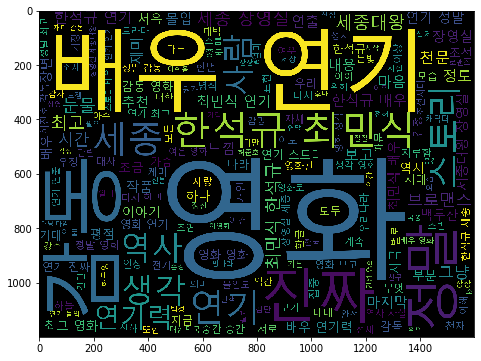

In [15]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud)

### **1-2) 평점 7이상(긍정리뷰) vs 6이하(부정리뷰)로 구분하여 각각 감성분석 실시**

In [17]:
good = astro.loc[astro['score'] >= 7]

In [18]:
bad = astro.loc[astro['score'] <= 6]

In [19]:
okt = Okt()
sep = [okt.pos(word) for word in good['review']]
sep_temp = np.sum(sep)
good_nouns = [word for word, type in sep_temp if type == 'Noun']
good_nouns2 = [word for word in good_nouns if len(word) >= 2]

In [20]:
okt = Okt()
sep = [okt.pos(word) for word in bad['review']]
sep_temp = np.sum(sep)
bad_nouns = [word for word, type in sep_temp if type == 'Noun']
bad_nouns2 = [word for word in bad_nouns if len(word) >= 2]

### **1-3) 전체 vs 7이상 vs 6이하의 단어 비교 검토**

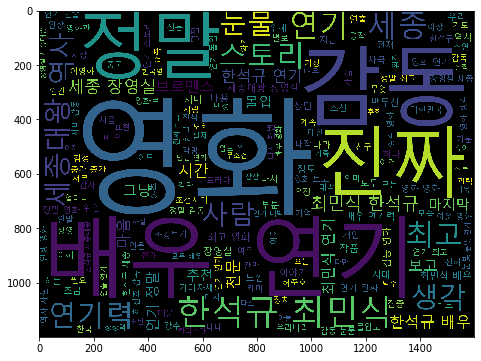

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(good_nouns2))
plt.figure(figsize = (12,6))
plt.imshow(wordcloud)

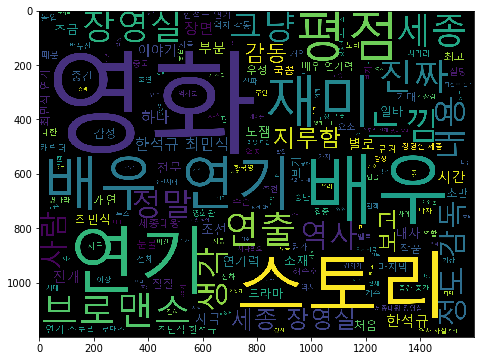

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(bad_nouns2))
plt.figure(figsize = (12,6))
plt.imshow(wordcloud)

### **1-4) Q: 백두산, 알바 등의 단어가 눈에 띄나요?**
### **1-5) 긍정리뷰/부정리뷰 각각에 '백두산', '알바' 의 등장 횟수 검토**

In [23]:
baek_bad = 0
alba_bad = 0
for i in range(len(bad_nouns2)):
    if bad_nouns2[i] == '알바':
        alba_bad += 1
    else:
        alba_bad = alba_bad
    if bad_nouns2[i] == '백두산':
        baek_bad += 1
    else:
        baek_bad = baek_bad

In [24]:
baek_good = 0
alba_good = 0
for i in range(len(good_nouns2)):
    if good_nouns2[i] == '알바':
        alba_good += 1
    else:
        alba_good = alba_good
    if good_nouns2[i] == '백두산':
        baek_good += 1
    else:
        baek_good = baek_good

In [25]:
print('긍정리뷰 백두산 등장 횟수 : ' + str(baek_good))
print('긍정리뷰 알바 등장 횟수 : ' + str(alba_good))
print('부정리뷰 백두산 등장 횟수 : ' + str(baek_bad))
print('부정리뷰 알바 등장 횟수 : ' + str(alba_bad))

긍정리뷰 백두산 등장 횟수 : 329
긍정리뷰 알바 등장 횟수 : 31
부정리뷰 백두산 등장 횟수 : 31
부정리뷰 알바 등장 횟수 : 72


## **2. id 데이터의 처리**

### **2-1) 닉(spha****)에서 아이디만 추출하여 id2 컬럼 생성**

In [26]:
id2 = []
for i in range(len(astro['id'])):
    try:
        id2.append(astro['id'][i].split('(')[1][:-1])
    except:
        id2.append(astro['id'][i])

In [27]:
astro['id2'] = id2

In [28]:
astro.head()

,score,review,id,date,like,dislike,id2
0,9,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019-12-26 09:19:00,3390,265,trym****
1,10,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019-12-26 09:14:00,2714,400,assu****
2,10,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019-12-26 10:37:00,2351,264,goo1****
3,10,백두산에서 온 알바들아~~평점테러 하지마라!! 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019-12-26 10:25:00,1889,340,atta****
4,10,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019-12-26 09:26:00,1450,166,ykjh****


2-2) 동일 아이디를 검토하여 알바가 있다고 판단할 수 있는지 검토

​

3. 알바가 있는지 여부를 근거를 들어 결론을 도출해보세요

In [29]:
astro['id2']

0        trym****
1        assu****
2        goo1****
3        atta****
4        ykjh****
           ...   
12458    trus****
12459    khmw****
12460    giss****
12461    maxk****
12462    kawa****
Name: id2, Length: 12463, dtype: object

In [30]:
grouped = astro['score'].groupby(astro['id2'])
grouped.count()

id2
00-b****    1
0005****    1
007q****    1
007w****    1
0092****    1
           ..
zzor****    1
zzso****    1
zzxx****    1
zzza****    1
zzzz****    1
Name: score, Length: 9489, dtype: int64

In [32]:
df1 = pd.DataFrame()
for i in range(len(grouped.count())):
    if grouped.count()[i] != 1:
        df2 = astro.loc[astro['id2']==grouped.count().index[i]]
        df1 = pd.concat([df1, df2])

In [33]:
df1

,score,review,id,date,like,dislike,id2
9443,10,,ㄱㄱ(0112****),2020-10-09 20:21:00,0,0,0112****
9670,10,,어쨌든 전진(0112****),2020-08-17 12:34:00,0,0,0112****
7783,10,태정태세!문단세 예성연중인명선 광인효현숙경영 정순헌철고순,멋진이(0726****),2019-12-26 20:45:00,1,0,0726****
10613,10,,H H(0726****),2020-01-13 12:50:00,2,2,0726****
176,10,연기 장인들의 수업을 받은 느낌이다! 너무 감명적으로 보게되었습니다,1004****,2019-12-28 19:53:00,25,2,1004****
...,...,...,...,...,...,...,...
11420,2,두 천재의 만남이라기에 연구와 발명 과정에서 나올 수 있는 성장과 재미있는 스토리를...,zizi****,2020-01-04 17:43:00,3,4,zizi****
4351,10,오랫만에 참 좋은 영화를 본거 같습니다. 여운이 오래 가네요.모든 배우님들의 연기....,색종이(zong****),2020-01-02 06:55:00,2,0,zong****
7382,10,,이종민(zong****),2019-12-29 14:22:00,1,0,zong****
2760,10,정말 재미있고 중간부터 울었네여 ㅠㅠ,한다희(zxcc****),2019-12-28 01:43:00,3,0,zxcc****


In [35]:
pd.DataFrame(df1['id2'].groupby(df1['score']).count())

,id2
score,
1,138
2,131
3,18
4,89
5,48
6,187
7,109
8,317
9,285


([<matplotlib.axis.XTick at 0x225e3db9788>,
 <a list of 10 Text xticklabel objects>)

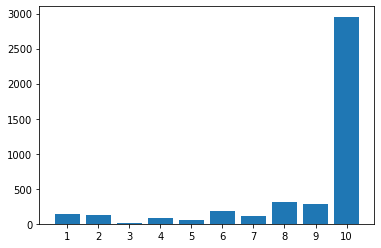

In [36]:
plt.bar(pd.DataFrame(df1['id2'].groupby(df1['score']).count()).index, pd.DataFrame(df1['id2'].groupby(df1['score']).count())['id2'])
plt.xticks(np.linspace(1,10,10))